In [1]:
import mplhep
import matplotlib.pyplot as plt
import hist
import mplhep
import matplotlib as mpl
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['grid.color'] = "#CCCCCC"
mpl.rcParams['grid.linewidth'] = 0.5
mpl.rcParams['figure.edgecolor'] = 'none'

In [2]:
import sys
sys.path.append("..")

import utils
import vector
import pandas as pd
import numpy as np

In [3]:
 samples = {
    "hh4b": ["GluGlutoHHto4B_cHHH1_TuneCP5_PSWeights_13TeV-powheg-pythia8"],
}

# define dictionary with directories of files (this can be configured in a yaml file later in the script)

# this is the directory to the files
path_to_dir = "/eos/uscms/store/user/cmantill/bbbb/matching/Oct30ApplySelection/"
dirs = {path_to_dir: samples}
year = "2018"

#filters = None
filters = [
    [
        ("('ak8FatJetPt', '0')", ">=", 300),
        ("('ak8FatJetMsd', '0')", ">=", 60),
        ("('ak8FatJetPNetXbb', '0')", ">=", 0.9734),
        ("('ak8FatJetPNetXbb', '1')", "<", 0.9734),
    ]
]

# dictionary that will contain all information (from all samples)
events_dict = {}
for input_dir, samples in dirs.items():
    events_dict = {
        **events_dict,
        # this function will load files (only the columns selected), apply filters and compute a weight per event
        **utils.load_samples(input_dir, samples, year, filters=filters),
    }

samples_loaded = list(events_dict.keys())
keys_loaded = list(events_dict[samples_loaded[0]].keys())
print(f"Keys in events_dict")
for i in keys_loaded: print(i)

Loading GluGlutoHHto4B_cHHH1_TuneCP5_PSWeights_13TeV-powheg-pythia8
Keys in events_dict
('ht', 0)
('GenHiggsEta', 0)
('GenHiggsEta', 1)
('GenHiggsPhi', 0)
('GenHiggsPhi', 1)
('GenHiggsMass', 0)
('GenHiggsMass', 1)
('GenHiggsPt', 0)
('GenHiggsPt', 1)
('GenbEta', 0)
('GenbEta', 1)
('GenbEta', 2)
('GenbEta', 3)
('GenbPhi', 0)
('GenbPhi', 1)
('GenbPhi', 2)
('GenbPhi', 3)
('GenbMass', 0)
('GenbMass', 1)
('GenbMass', 2)
('GenbMass', 3)
('GenbPt', 0)
('GenbPt', 1)
('GenbPt', 2)
('GenbPt', 3)
('ak4JetHiggsMatch', 0)
('ak4JetHiggsMatch', 1)
('ak4JetHiggsMatch', 2)
('ak4JetHiggsMatch', 3)
('ak4JetHiggsMatch', 4)
('ak4JetHiggsMatch', 5)
('ak4JetHiggsMatchIndex', 0)
('ak4JetHiggsMatchIndex', 1)
('ak4JetHiggsMatchIndex', 2)
('ak4JetHiggsMatchIndex', 3)
('ak4JetHiggsMatchIndex', 4)
('ak4JetHiggsMatchIndex', 5)
('ak4JethadronFlavour', 0)
('ak4JethadronFlavour', 1)
('ak4JethadronFlavour', 2)
('ak4JethadronFlavour', 3)
('ak4JethadronFlavour', 4)
('ak4JethadronFlavour', 5)
('ak8FatJetHiggsMatch', 0)
('a

# Pairing efficiency for semi-resolved events

In [4]:
def make_vector(events: pd.DataFrame, obj: str):
    """Create a ``vector`` object from the columns of the dataframe"""
    mstring = "PNetMass" if obj == "ak8FatJet" else "Mass"

    return vector.array(
        {
            "pt": events[f"{obj}Pt"],
            "phi": events[f"{obj}Phi"],
            "eta": events[f"{obj}Eta"],
            "M": events[f"{obj}{mstring}"],
        }
    )

In [5]:
events = events_dict["hh4b"]

In [6]:
jets = make_vector(events, "ak4Jet")
jets_outside = make_vector(events, "ak4JetOutside")
fatjets = make_vector(events, "ak8FatJet")
gen_higgs = make_vector(events, "GenHiggs")
gen_bs = make_vector(events, "Genb")

In [7]:
events.ak4JetOutsidebtagDeepFlavB

,0,1,2,3,4,5
0,0.999512,0.907715,0.087585,0.019608,0.010628,0.009132
1,0.961914,0.429688,0.317871,0.062622,0.052368,0.047363
2,0.999512,0.695312,0.015190,0.004673,-99999.000000,-99999.000000
3,0.380615,0.362305,0.125122,0.059723,0.059692,-99999.000000
4,0.969238,0.543457,0.138306,0.066956,0.062469,0.053528
...,...,...,...,...,...,...
38208,0.990723,0.288818,0.286377,0.010399,-99999.000000,-99999.000000
38209,0.998047,0.984863,0.302490,0.021774,-99999.000000,-99999.000000
38210,0.996094,0.799805,0.113159,0.076782,-99999.000000,-99999.000000
38211,0.941895,0.810547,0.061371,0.035034,0.034454,0.031708


In [8]:
dijet_mass_axis = hist.axis.Regular(20, 60, 200, name="dijet_mass", label="H Mass [GeV]")
pair_axis = hist.axis.StrCategory([], name="pair", growth=True)

def get_mass_resolution(ak4pair_dijet, fatjet, label_ak4, label_fj, title):
    hh_mass_axis = hist.axis.Regular(20, 60, 200, name="hh_mass", label="HH reconstructed mass [GeV]")
    pair_axis = hist.axis.StrCategory([], name="pair", growth=True)

    h = hist.Hist(dijet_mass_axis, pair_axis)
    h.fill(dijet_mass=ak4pair_dijet.mass, pair="0")
    h.fill(dijet_mass=fatjet.mass, pair="fj")

    fig, ax = plt.subplots(figsize=(8, 8))
    h[{"pair": "fj"}].plot1d(label=f"AK8 ({label_fj})", ax=ax, flow='none')
    h[{"pair": "0"}].plot1d(label=f"AK4 pair ({label_ak4})", ax=ax, flow='none')
    ax.legend(title=title)

In [9]:
from hist.intervals import clopper_pearson_interval

hh_axis = hist.axis.Regular(10, 250, 2000, name="hh_mass", label="HH Mass [GeV]")

def get_efficiency(ak4pair_dijet, fatjet, label):
    h1 = gen_higgs[:, 0]
    h2 = gen_higgs[:, 1]
    # calculate m_HH for every event
    mhh_gen = (h1 + h2).m

    # mHH from reco
    mhh_reco = (ak4pair_dijet + fatjet).m

    # match selected ak4 jets to H
    ak4drH1b1 = ak4pair_dijet.deltaR(gen_bs[:, 0])
    ak4drH1b2 = ak4pair_dijet.deltaR(gen_bs[:, 1])
    ak4drH2b1 = ak4pair_dijet.deltaR(gen_bs[:, 2])
    ak4drH2b1 = ak4pair_dijet.deltaR(gen_bs[:, 3])
    ak4drH = np.stack([ak4drH1b1, ak4drH1b2, ak4drH2b1, ak4drH2b1], axis=1)
    ak4Hindex = np.floor(np.argmin(ak4drH, axis=-1) / 2)

    # match selected ak8 jets to H
    ak8drH1 = fatjet.deltaR(h1)
    ak8drH2 = fatjet.deltaR(h2)
    ak8drH = np.stack([ak8drH1, ak8drH2], axis=1)
    ak8Hindex = np.argmin(ak8drH, axis=-1)

    # masks
    matchedak4 = np.any(ak4drH < 0.4, axis=1)
    matchedak8 = np.any(ak8drH < 0.8, axis=1)
    mhh_gen_matched = mhh_gen[matchedak4 & matchedak8]

    # calculate efficiency and purity for each event
    
    # efficiency: N reconstructed H bosons matched to gen / N reconstructed Higgs bosons
    h_num = hist.Hist(hh_axis)
    h_num.fill(hh_mass=mhh_gen_matched)

    h_denom = hist.Hist(hh_axis)
    h_denom.fill(hh_mass=mhh_reco)

    efficiency = h_num/h_denom
    efficiency_yerr = abs(clopper_pearson_interval(h_num.view(), h_denom.view())- h_num.view() / h_denom.view())

    # purity: N reconstructed H bosons matched to gen / N gen Higgs bosons
    h_denom = hist.Hist(hh_axis)
    h_denom.fill(hh_mass=mhh_gen)
    purity = h_num/h_denom
    purity_yerr = abs(clopper_pearson_interval(h_num.view(), h_denom.view())- h_num.view() / h_denom.view())

    return efficiency, efficiency_yerr, purity, purity_yerr

### Pairing with 2 ak4 jets with highest b-jet score
- 2 jets outside the FatJet
- with highest b-jet score

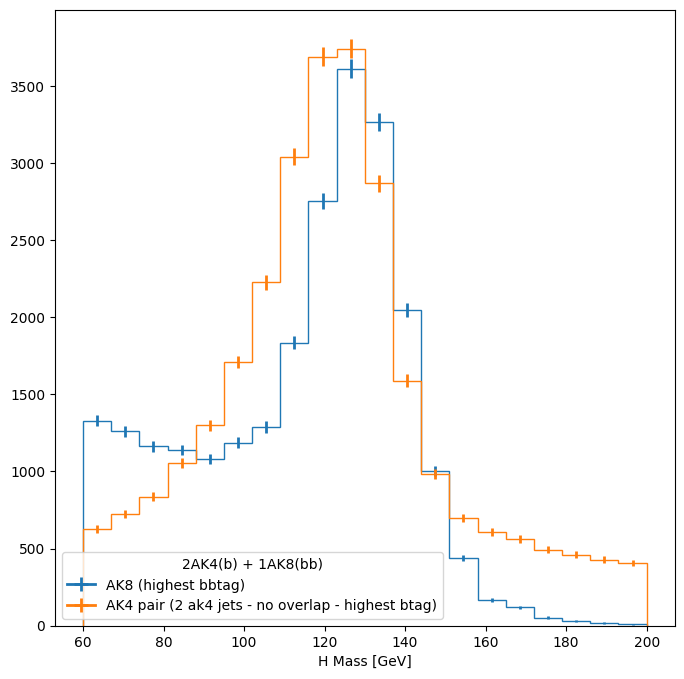

In [10]:
first_bb_j1 = jets_outside[:, 0]
first_bb_j2 = jets_outside[:, 1]
first_bb_dijet = first_bb_j1 + first_bb_j2

fatjet_0 = fatjets[:, 0]

get_mass_resolution(first_bb_dijet, fatjet_0, "2 ak4 jets - no overlap - highest btag", "highest bbtag", "2AK4(b) + 1AK8(bb)")
efficiency_0, efficiency_yerr_0, purity_0, purity_yerr_0 = get_efficiency(first_bb_dijet, fatjet_0, label="2AK4(b) + 1AK8(bb)")

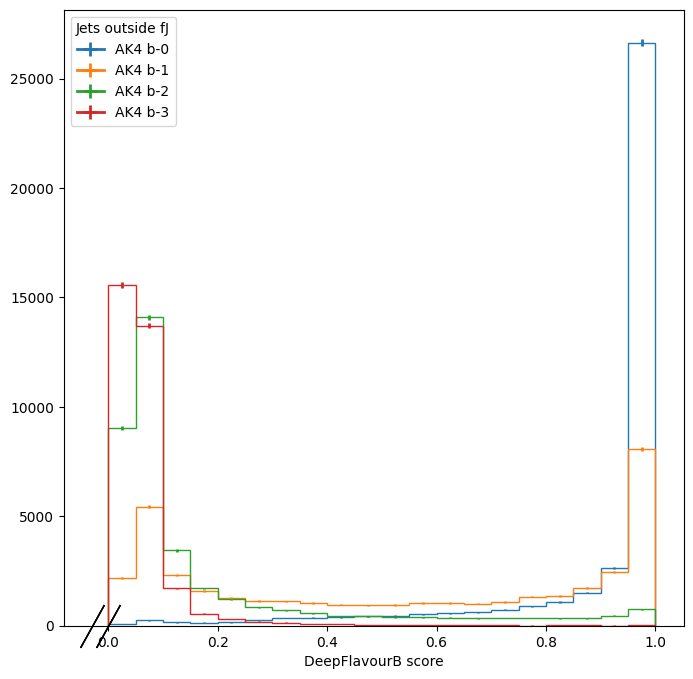

In [11]:
# plot b-tagging score of all ak4 jets outside
b_outside = events.ak4JetOutsidebtagDeepFlavB.to_numpy()

btag_axis = hist.axis.Regular(20, 0, 1, name="btag", label="DeepFlavourB score")
jet_axis = hist.axis.StrCategory([], name="jet", growth=True)

h = hist.Hist(btag_axis, jet_axis)
h.fill(btag=b_outside[:, 0], jet="0")
h.fill(btag=b_outside[:, 1], jet="1")
h.fill(btag=b_outside[:, 2], jet="2")
h.fill(btag=b_outside[:, 3], jet="3")

fig, ax = plt.subplots(figsize=(8, 8))
h[{"jet": "0"}].plot1d(label=f"AK4 b-0", ax=ax)
h[{"jet": "1"}].plot1d(label=f"AK4 b-1", ax=ax)
h[{"jet": "2"}].plot1d(label=f"AK4 b-2", ax=ax)
h[{"jet": "3"}].plot1d(label=f"AK4 b-3", ax=ax)
ax.legend(title="Jets outside fJ")

Text(0.5, 1.0, '$\\Delta R$ between chosen jets')

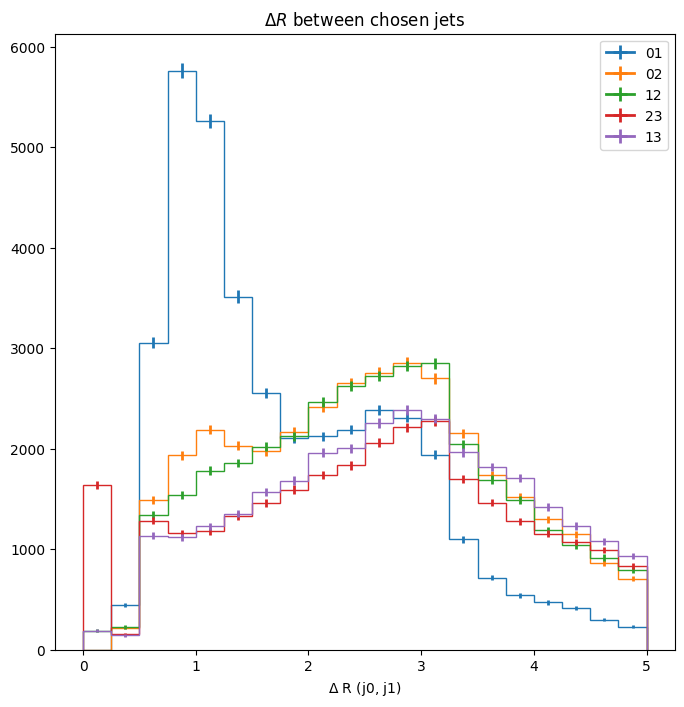

In [12]:
# plot dr between chosen jets
deltar_axis = hist.axis.Regular(20, 0, 5, name="deltar", label=r"$\Delta$ R (j0, j1)")
jet_axis = hist.axis.StrCategory([], name="jet_choice", growth=True)

h = hist.Hist(deltar_axis, jet_axis)
h.fill(deltar=jets_outside[:, 0].deltaR(jets_outside[:, 1]), jet_choice="01")
h.fill(deltar=jets_outside[:, 0].deltaR(jets_outside[:, 2]), jet_choice="02")
h.fill(deltar=jets_outside[:, 1].deltaR(jets_outside[:, 2]), jet_choice="12")
h.fill(deltar=jets_outside[:, 2].deltaR(jets_outside[:, 3]), jet_choice="23")
h.fill(deltar=jets_outside[:, 1].deltaR(jets_outside[:, 3]), jet_choice="13")


fig, ax = plt.subplots(figsize=(8, 8))
h.plot1d(flow='none')
ax.legend()
ax.set_title(r"$\Delta R$ between chosen jets")

### Pairing with 2 ak4 jets with min dHH and max dR to fj
- Using 4 ak4 jets (not outside of the jet) compute pairs that satisfy min dHH
- Order pairs by min dR to candidate fj

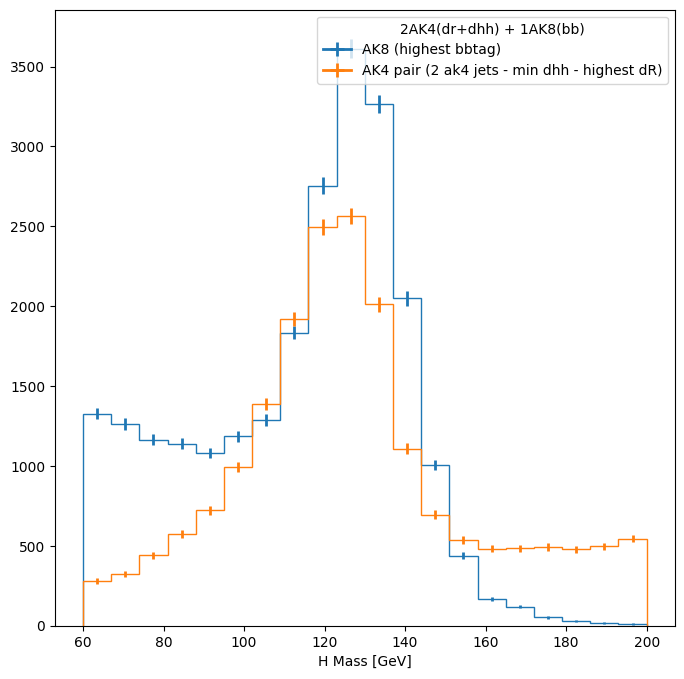

In [13]:
first_bb_pair = events.ak4JetPair0.to_numpy()
second_bb_pair = events.ak4JetPair1.to_numpy()

first_bb_j1 = jets[np.arange(len(jets.pt)), first_bb_pair[:, 0]]
first_bb_j2 = jets[np.arange(len(jets.pt)), first_bb_pair[:, 1]]
first_bb_dijet = first_bb_j1 + first_bb_j2

second_bb_j1 = jets[np.arange(len(jets.pt)), second_bb_pair[:, 0]]
second_bb_j2 = jets[np.arange(len(jets.pt)), second_bb_pair[:, 1]]
second_bb_dijet = second_bb_j1 + second_bb_j2

fatjet_0 = fatjets[:, 0]

get_mass_resolution(first_bb_dijet, fatjet_0, "2 ak4 jets - min dhh - highest dR", "highest bbtag", "2AK4(dr+dhh) + 1AK8(bb)")
efficiency_1, efficiency_yerr_1, purity_1, purity_yerr_1 = get_efficiency(first_bb_dijet, fatjet_0, label="2AK4(dr+dhh) + 1AK8(bb)")

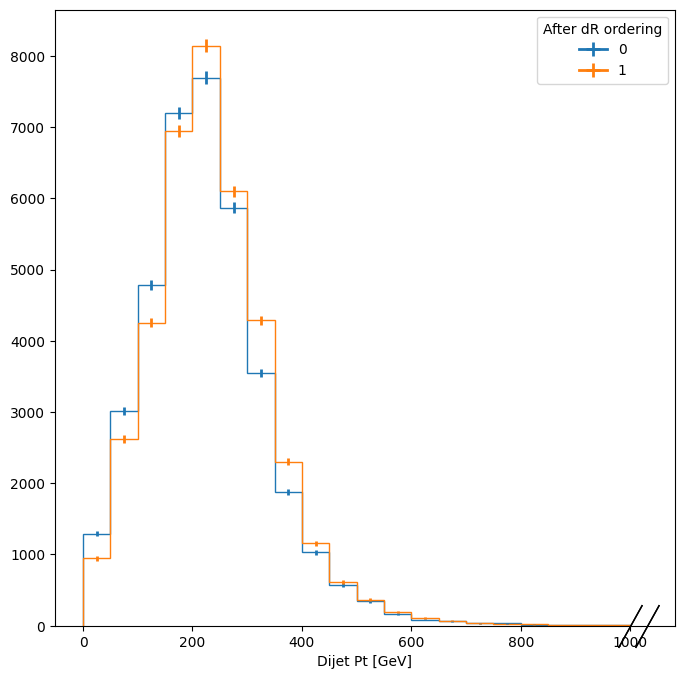

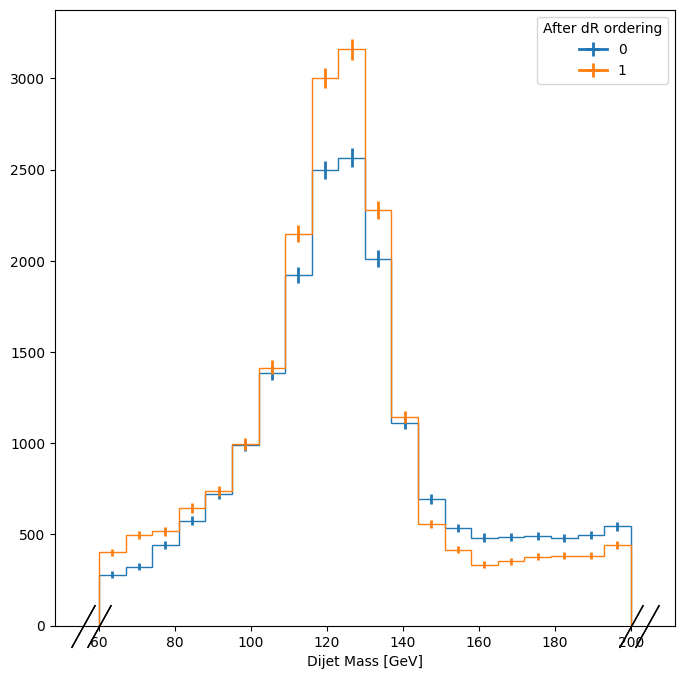

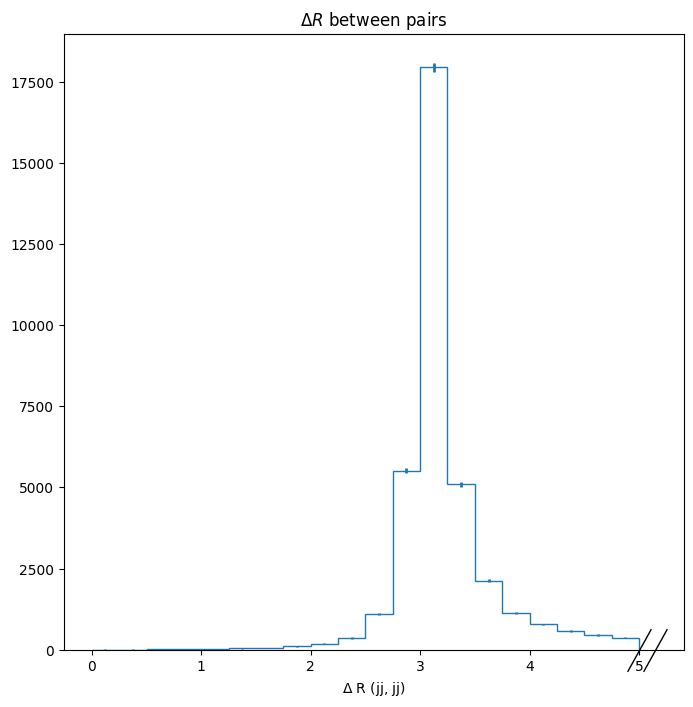

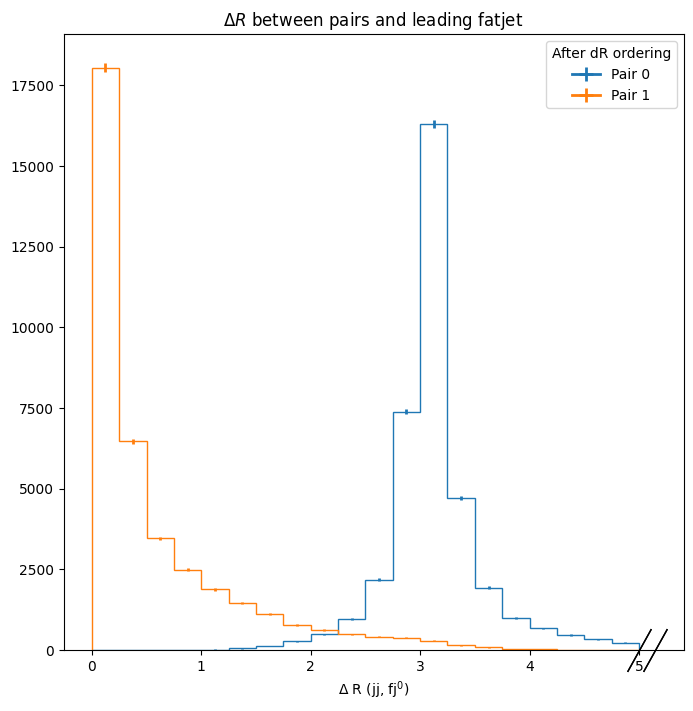

In [14]:
# verify that indeed these pairs have min dr
dijet_pt_axis = hist.axis.Regular(20, 0, 1000, name="dijet_pt", label="Dijet Pt [GeV]")
pair_axis = hist.axis.StrCategory([], name="pair", growth=True)

h = hist.Hist(dijet_pt_axis, pair_axis)
h.fill(dijet_pt=first_bb_dijet.pt, pair="0")
h.fill(dijet_pt=second_bb_dijet.pt, pair="1")

fig, ax = plt.subplots(figsize=(8, 8))
h[{"pair": "0"}].plot1d(label="0", ax=ax)
h[{"pair": "1"}].plot1d(label="1", ax=ax)
ax.legend(title="After dR ordering")

dijet_mass_axis = hist.axis.Regular(20, 60, 200, name="dijet_mass", label="Dijet Mass [GeV]")

h = hist.Hist(dijet_mass_axis, pair_axis)
h.fill(dijet_mass=first_bb_dijet.mass, pair="0")
h.fill(dijet_mass=second_bb_dijet.mass, pair="1")

fig, ax = plt.subplots(figsize=(8, 8))
h[{"pair": "0"}].plot1d(label="0", ax=ax)
h[{"pair": "1"}].plot1d(label="1", ax=ax)
ax.legend(title="After dR ordering")

# deltar between pairs
deltar_axis = hist.axis.Regular(20, 0, 5, name="deltar", label=r"$\Delta$ R (jj, jj)")
h = hist.Hist(deltar_axis)
h.fill(deltar=first_bb_dijet.deltaR(second_bb_dijet))

fig, ax = plt.subplots(figsize=(8, 8))
h.plot1d()
ax.set_title(r"$\Delta R$ between pairs")

deltar_axis = hist.axis.Regular(20, 0, 5, name="deltar", label=r"$\Delta$ R (jj, fj$^0$)")
h = hist.Hist(deltar_axis, pair_axis)
h.fill(deltar=first_bb_dijet.deltaR(fatjet_0), pair="0")
h.fill(deltar=second_bb_dijet.deltaR(fatjet_0), pair="1")

fig, ax = plt.subplots(figsize=(8, 8))
h[{"pair": 0}].plot1d(label="Pair 0", ax=ax)
h[{"pair": 1}].plot1d(label="Pair 1", ax=ax)
ax.set_title(r"$\Delta R$ between pairs and leading fatjet")
ax.legend(title="After dR ordering")

### Pairing with min chi2 to HH using ak4Jets outside the jet


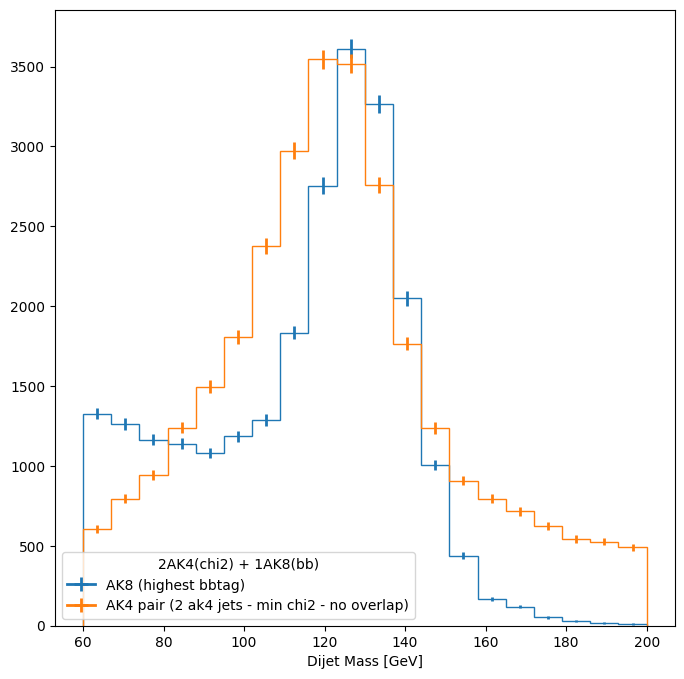

In [15]:
first_bb_pair = events.ak4Pair0chi2.to_numpy()
second_bb_pair = events.ak4Pair1chi2.to_numpy()


first_bb_j1 = jets_outside[np.arange(len(jets_outside.pt)), first_bb_pair[:, 0]]
first_bb_j2 = jets_outside[np.arange(len(jets_outside.pt)), first_bb_pair[:, 1]]
first_bb_dijet = first_bb_j1 + first_bb_j2

second_bb_j1 = jets_outside[np.arange(len(jets_outside.pt)), second_bb_pair[:, 0]]
second_bb_j2 = jets_outside[np.arange(len(jets_outside.pt)), second_bb_pair[:, 1]]
second_bb_dijet = second_bb_j1 + second_bb_j2


fatjet_0 = fatjets[:, 0]

get_mass_resolution(first_bb_dijet, fatjet_0, "2 ak4 jets - min chi2 - no overlap", "highest bbtag", "2AK4(chi2) + 1AK8(bb)")
efficiency_2, efficiency_yerr_2, purity_2, purity_yerr_2 = get_efficiency(first_bb_dijet, fatjet_0, label="2AK4(chi2) + 1AK8(bb)")


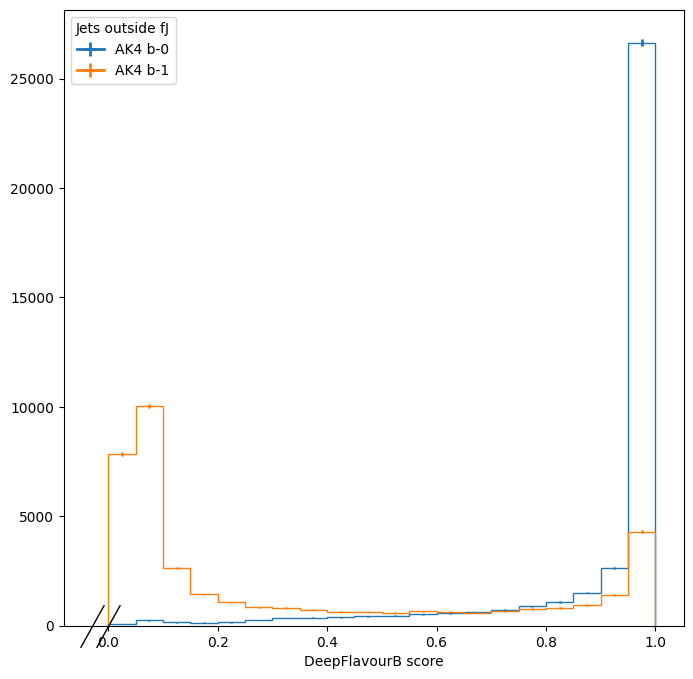

In [16]:
b_outside = events.ak4JetOutsidebtagDeepFlavB.to_numpy()

b_0 = b_outside[np.arange(len(jets_outside.pt)), first_bb_pair[:, 0]]
b_1 = b_outside[np.arange(len(jets_outside.pt)), first_bb_pair[:, 1]]

# plot b-tagging score of chosen ak4 jets
btag_axis = hist.axis.Regular(20, 0, 1, name="btag", label="DeepFlavourB score")
jet_axis = hist.axis.StrCategory([], name="jet", growth=True)

h = hist.Hist(btag_axis, jet_axis)
h.fill(btag=b_0, jet="0")
h.fill(btag=b_1, jet="1")

fig, ax = plt.subplots(figsize=(8, 8))
h[{"jet": "0"}].plot1d(label=f"AK4 b-0", ax=ax)
h[{"jet": "1"}].plot1d(label=f"AK4 b-1", ax=ax)
ax.legend(title="Jets outside fJ")


Text(0.5, 1.0, '$\\Delta R$ between chosen jets')

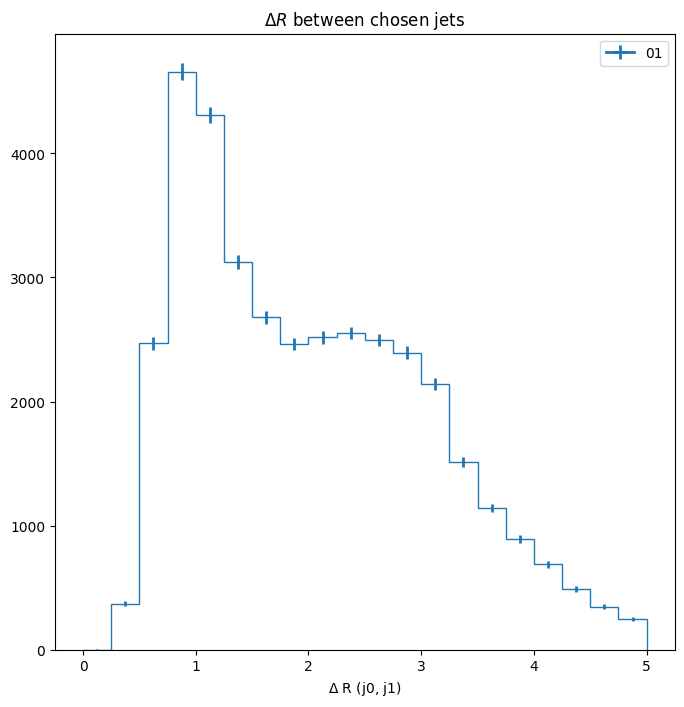

In [17]:
# plot dr between chosen jets
deltar_axis = hist.axis.Regular(20, 0, 5, name="deltar", label=r"$\Delta$ R (j0, j1)")
jet_axis = hist.axis.StrCategory([], name="jet_choice", growth=True)

h = hist.Hist(deltar_axis, jet_axis)
h.fill(deltar=first_bb_j1.deltaR(first_bb_j2), jet_choice="01")


fig, ax = plt.subplots(figsize=(8, 8))
h.plot1d(flow='none')
ax.legend()
ax.set_title(r"$\Delta R$ between chosen jets")

Text(0.5, 1.0, '$\\Delta R$ between chosen jets and fatjet')

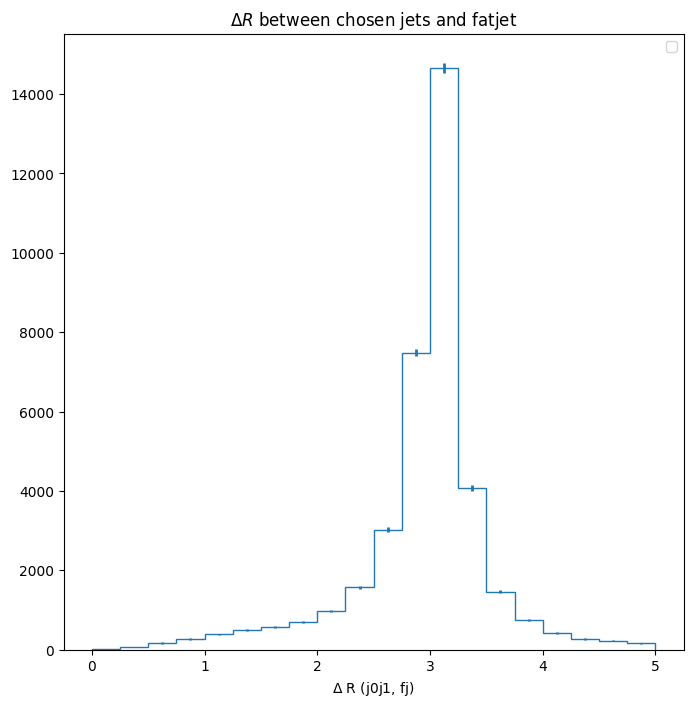

In [18]:
# plot dR with fatjet

deltar_axis = hist.axis.Regular(20, 0, 5, name="deltar", label=r"$\Delta$ R (j0j1, fj)")

h = hist.Hist(deltar_axis)
h.fill(deltar=first_bb_dijet.deltaR(fatjet_0))

fig, ax = plt.subplots(figsize=(8, 8))
h.plot1d(flow='none')
ax.legend()
ax.set_title(r"$\Delta R$ between chosen jets and fatjet")


# Comparing efficiencies and purity

In [19]:
def plot_efficiency(efficiencies, efficiencies_yerr, labels, ltype="Efficiency"):
    fig, ax = plt.subplots(figsize=(8, 8))
    for i, efficiency in enumerate(efficiencies):
        edges, counts = efficiency.to_numpy()
        mplhep.histplot(edges, counts, label=labels[i], yerr=efficiencies_yerr[i])
    ax.set_title(ltype)
    ax.grid()
    ax.set_ylim(0,1)
    if ltype == "Efficiency":
        ax.set_xlabel("HH Mass [GeV]")
    else:
        ax.set_xlabel("HH Mass [GeV]")
    ax.legend()

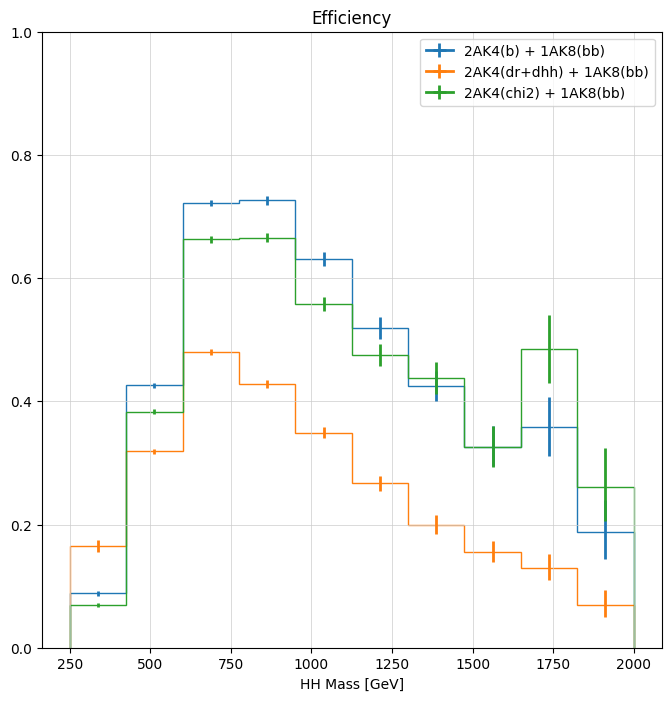

In [20]:
plot_efficiency(
    [efficiency_0, efficiency_1, efficiency_2], 
    [efficiency_yerr_0, efficiency_yerr_1, efficiency_yerr_2], 
    [
        "2AK4(b) + 1AK8(bb)",
        "2AK4(dr+dhh) + 1AK8(bb)",
        "2AK4(chi2) + 1AK8(bb)"
    ],
)

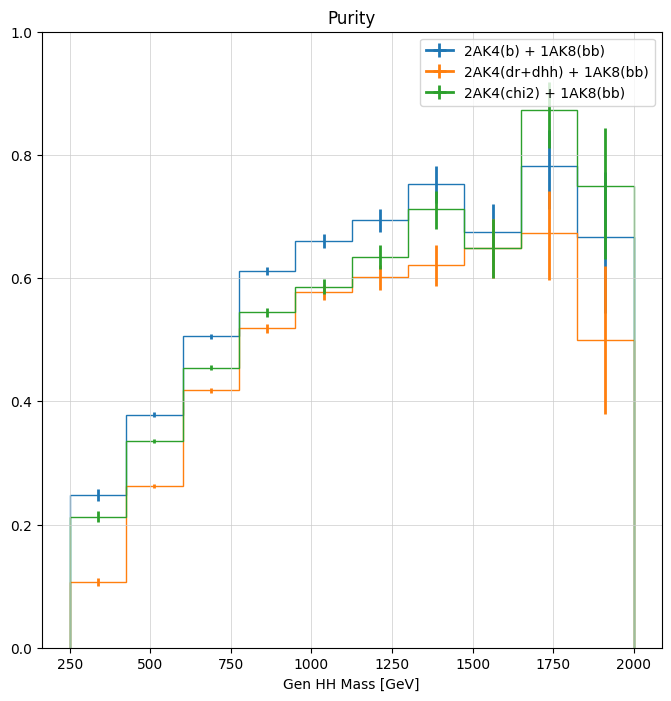

In [21]:
plot_efficiency(
    [purity_0, purity_1, purity_2], 
    [purity_yerr_0, purity_yerr_1, purity_yerr_2], 
    [
        "2AK4(b) + 1AK8(bb)",
        "2AK4(dr+dhh) + 1AK8(bb)",
        "2AK4(chi2) + 1AK8(bb)"
    ],
    "Purity"
)